In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras import layers
from keras.models import Sequential

In [3]:
dataset_train = pd.read_csv('trainset.csv')

In [4]:
dataset_train.columns
dataset_train.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2013-01-02,357.385559,361.151062,355.959839,359.288177,359.288177,5115500
1,2013-01-03,360.122742,363.600128,358.031342,359.496826,359.496826,4666500
2,2013-01-04,362.313507,368.339294,361.488861,366.600616,366.600616,5562800
3,2013-01-07,365.348755,367.301056,362.929504,365.001007,365.001007,3332900
4,2013-01-08,365.393463,365.771027,359.874359,364.280701,364.280701,3373900


In [5]:
train_set = dataset_train.iloc[:,1:2].values

In [6]:
type(train_set)

numpy.ndarray

In [7]:
train_set.shape

(1259, 1)

In [8]:
sc = MinMaxScaler(feature_range=(0,1))

In [9]:
training_set_scaled = sc.fit_transform(train_set)

In [10]:
training_set_scaled.shape

(1259, 1)

In [11]:
X_train_array = []

In [12]:
y_train_array = []

In [13]:
for i in range(60, 1259):
  X_train_array.append(training_set_scaled[i-60:i,0])
  y_train_array.append(training_set_scaled[i,0])

In [14]:
X_train, y_train = np.array(X_train_array), np.array(y_train_array)

In [15]:
X_train1 = X_train.reshape((X_train.shape[0], X_train.shape[1],1))

In [16]:
X_train.shape

(1199, 60)

In [17]:
length = 60
n_features = 1


In [18]:
model = Sequential([layers.SimpleRNN(50,input_shape=(60,1)),
                    layers.Dense(1)])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [19]:
model.compile(optimizer='adam',loss='mse')

In [22]:
print(' NAME: VETRIVEL S     REG NO:212221240060')
model.summary()


 NAME: VETRIVEL S     REG NO:212221240060


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)               │ (None, 50)                  │           2,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,955 (31.08 KB)

 Trainable params: 2,651 (10.36 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 5,304 (20.72 KB)

In [21]:
model.fit(X_train1,y_train,epochs=20, batch_size=32)

Epoch 1/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.0118
Epoch 2/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 7.2624e-04
Epoch 3/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 7.9824e-04
Epoch 4/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 5.3255e-04
Epoch 5/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 5.3482e-04
Epoch 6/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 6.9762e-04
Epoch 7/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 4.8504e-04
Epoch 8/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 4.0934e-04
Epoch 9/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 3.7987e-04
Epoch 10/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 3.5217e-04
Epoch 11/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 3.3836e-04
Epoch 12/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 3.4064e-04
Epoch 13/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 5.1080e-04
Epoch 14/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 3.6926e-04
Epoch 15/20
38/38 ━

In [25]:
dataset_test = pd.read_csv('testset.csv')
test_set = dataset_test.iloc[:,1:2].values
test_set.shape

(125, 1)

In [26]:
dataset_total = pd.concat((dataset_train['Open'],dataset_test['Open']),axis=0)

inputs = dataset_total.values
inputs = inputs.reshape(-1,1)
inputs_scaled=sc.transform(inputs)
X_test = []
y_test = []
for i in range(60,1384):
  X_test.append(inputs_scaled[i-60:i,0])
  y_test.append(inputs_scaled[i,0])
X_test = np.array(X_test)
X_test = np.reshape(X_test,(X_test.shape[0], X_test.shape[1],1))

X_test.shape


(1324, 60, 1)

In [27]:
predicted_stock_price_scaled = model.predict(X_test)

42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step


In [28]:
predicted_stock_price = sc.inverse_transform(predicted_stock_price_scaled)

 NAME: VETRIVEL S     REG NO:212221240060


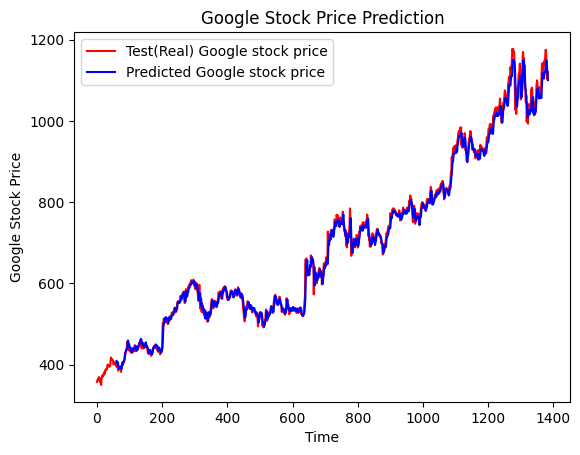

In [31]:
print(' NAME: VETRIVEL S     REG NO:212221240060')


plt.plot(np.arange(0,1384),inputs, color='red', label = 'Test(Real) Google stock price')
plt.plot(np.arange(60,1384),predicted_stock_price, color='blue',
		label = 'Predicted Google stock price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()

In [30]:
from sklearn.metrics import mean_squared_error as mse
mse = mse(y_test,predicted_stock_price)
print("Mean Squared Error = ",mse)

Mean Squared Error =  531905.8746930681
